In [11]:
clear all
set more off
macro drop _all
set seed 8675309
set linesize 100
set scheme dubois, permanently







(set scheme preference recorded)


In [12]:
%set graph_format svg --permanently

In [26]:
quietly import excel using "https://github.com/jcolond/dnd/raw/master/dnd.xlsx", sheet("AGI") firstrow clear
quietly label define AGI_lab 1 "$100-$30K" 2 "$30K-$48K" 3 "$48K-$75K" 4 "$75K-$110K" 5 "$110K-$500K" 
quietly label values AGI AGI_lab
quietly rename Race_Ethnicity RE2
quietly encode RE2, generate(RE3)
quietly recode RE3 (1=4 Asian)(2=1 Black)(3=2 Latinx)(4=3 white), gen(Race_Ethnicity)

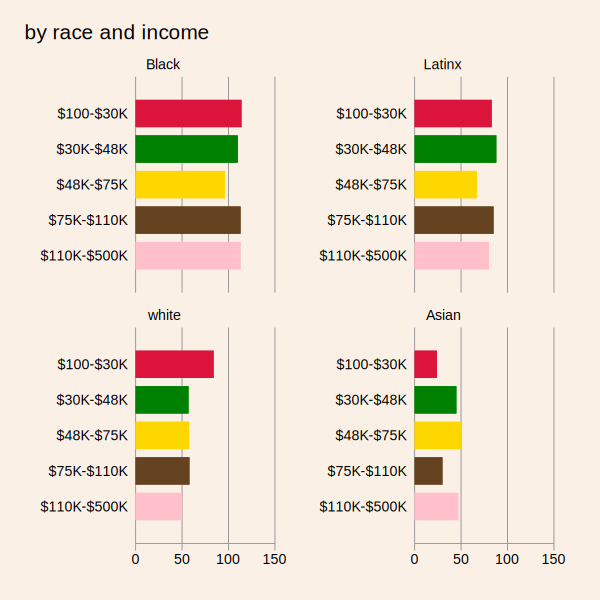

In [29]:
graph hbar Debt_ratio, over(AGI, gap(30)) ytitle("") asyvars showyvars xsize(5) ysize(5)  by(Race_Ethnicity, legend(off) title("by race and income", span position(11)) note("", size(small) position(2))) name(AGI, replace)

In [30]:
quietly import excel using "https://github.com/jcolond/dnd/raw/master/dnd.xlsx", sheet("EFC") firstrow clear
quietly label define EFC_lab 1 "$0" 2 "$1-$2,599" 3 "$2,600-$7,199" 4 "$7,200-$15,599" 5 "$15,600+" 
quietly label values EFC EFC_lab
quietly rename Race_Ethnicity RE2
quietly encode RE2, generate(RE3)
quietly recode RE3 (1=4 Asian)(2=1 Black)(3=2 Latinx)(4=3 white), gen(Race_Ethnicity)

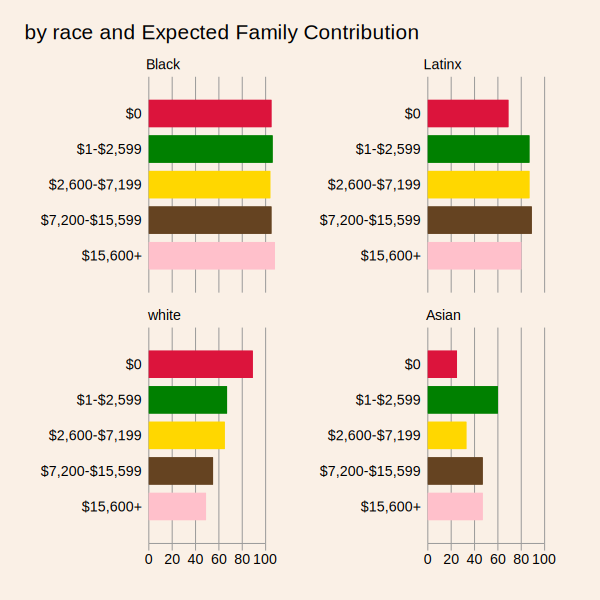

In [31]:
graph hbar Debt_ratio, over(EFC, gap(30)) ytitle("") asyvars showyvars xsize(5) ysize(5)  by(Race_Ethnicity, legend(off) title("by race and Expected Family Contribution", span position(11)) note("", size(small) position(2))) name(EFC, replace)

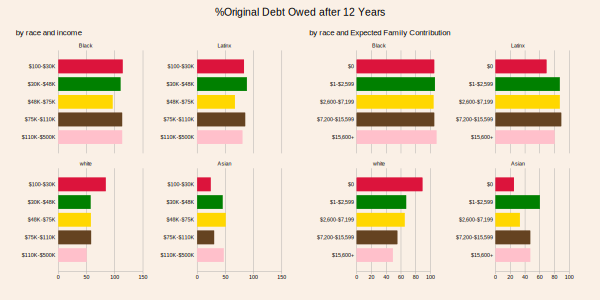

In [39]:
graph combine AGI EFC, title(%Original Debt Owed after 12 Years) xsize(10) ysize(5) name(AGIEFC, replace) rows(1)

In [34]:
clear
quietly set obs `=20'
quietly gen race=4
quietly replace race=3 if _n<16
quietly replace race=1 if _n<11
quietly replace race=2 if _n<6
label define race 1 "Black" 2 "white" 3 "Latinx" 4 "Asian"
label values race race
quietly gen efc=1
quietly replace efc=2 if _n==2 | _n==7 | _n==12 | _n==17
quietly replace efc=3 if _n==3 | _n==8 | _n==13 | _n==18
quietly replace efc=4 if _n==4 | _n==9 | _n==14 | _n==19
quietly replace efc=5 if _n==5 | _n==10 | _n==15 | _n==20
quietly label define efc 1 "$0" 2 "$1-2,599" 3 "$2,600-7,199" 4 "$7,200-15,599" 5 "$15,600 +"
quietly label values efc efc
quietly gen pcthelp=11.6368 if _n==1
quietly replace pcthelp=8.632 if _n==6
quietly replace pcthelp=13.0130 if _n==11
quietly replace pcthelp=9.3606 if _n==16
quietly replace pcthelp=15.2168 if _n==2
quietly replace pcthelp=11.3907 if _n==7
quietly replace pcthelp=15.0896 if _n==12
quietly replace pcthelp=22.6309 if _n==17
quietly replace pcthelp=16.0815 if _n==3
quietly replace pcthelp=7.6035 if _n==8
quietly replace pcthelp=15.4896 if _n==13
quietly replace pcthelp=22.4566 if _n==18
quietly replace pcthelp=21.5403 if _n==4
quietly replace pcthelp=9.5468 if _n==9
quietly replace pcthelp=18.0492 if _n==14
quietly replace pcthelp=. if _n==19
quietly replace pcthelp=25.6239 if _n==5
quietly replace pcthelp=30.1301 if _n==10
quietly replace pcthelp=16.1942 if _n==15
quietly replace pcthelp=. if _n==20
quietly rename race race2
quietly recode race2 (1=1 Black)(2=3 white)(3=2 Latinx)(4=4 Asian), gen(race)

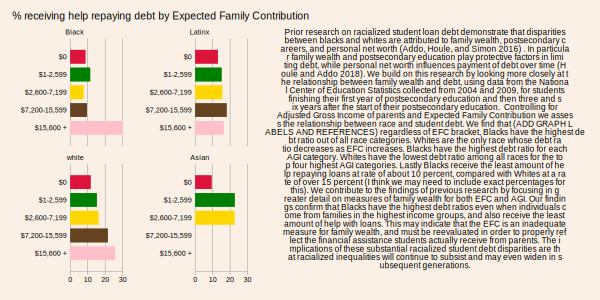

In [58]:
graph hbar pcthelp, over(efc, gap(30)) ytitle("") asyvars showyvars scheme(dubois) xsize(10) ysize(5) by(race, legend(off) title("% receiving help repaying debt by Expected Family Contribution", span position(11)) note("Prior research on racialized student loan debt demonstrate that disparities" " between blacks and whites are attributed to family wealth, postsecondary c" "areers, and personal net worth (Addo, Houle, and Simon 2016) . In particula" "r family wealth and postsecondary education play protective factors in limi" "ting debt, while personal net worth influences payment of debt over time (H" "oule and Addo 2018). We build on this research by looking more closely at t" "he relationship between family wealth and debt, using data from the Nationa" "l Center of Education Statistics collected from 2004 and 2009, for students" " finishing their first year of postsecondary education and then three and s" "ix years after the start of their postsecondary education.  Controlling for" " Adjusted Gross Income of parents and Expected Family Contribution we asses" "s the relationship between race and student debt. We find that (ADD GRAPH L" "ABELS AND REFERENCES) regardless of EFC bracket, Blacks have the highest de" "bt ratio out of all race categories. Whites are the only race whose debt ra" "tio decreases as EFC increases. Blacks have the highest debt ratio for each" " AGI category. Whites have the lowest debt ratio among all races for the to" "p four highest AGI categories. Lastly Blacks receive the least amount of he" "lp repaying loans at rate of about 10 percent, compared with Whites at a ra" "te of over 15 percent (I think we may need to include exact percentages for" " this). We contribute to the findings of previous research by focusing in g" "reater detail on measures of family wealth for both EFC and AGI. Our findin" "gs confirm that Blacks have the highest debt ratios even when individuals c" "ome from families in the highest income groups, and also receive the least" "amount of help with loans. This may indicate that the EFC is an inadequate " "measure for family wealth, and must be reevaluated in order to properly ref" "lect the financial assistance students actually receive from parents. The i" "mplications of these substantial racialized student debt disparities are th" "at racialized inequalities will continue to subsist and may even widen in s" "ubsequent generations.", size(small) position(3))) name(PCTHELP, replace)

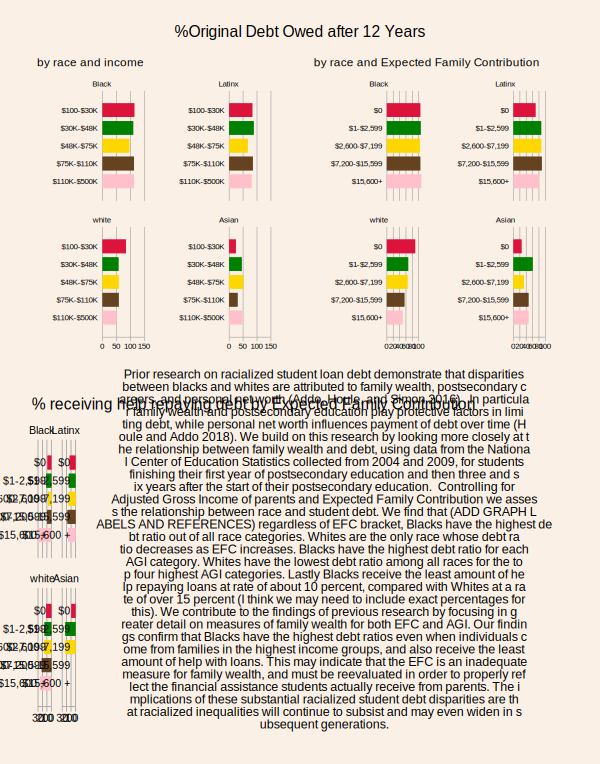

In [59]:
graph combine AGIEFC PCTHELP, rows(2)